In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Classification Algorithms

In [42]:
cols = ['party', 'infants',  'water',  'budget',  'physician',  'salvador',  'religious', 'satellite',  'aid',  'missile',  'immigration',  'synfuels',  'education',  'superfund', 'crime',  'duty_free_exports',  'eaa_rsa']
df = pd.read_csv('house-votes-84.csv', names=cols)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [43]:
df = df.replace('?', np.nan)

### EDA

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            423 non-null    object
 2   water              387 non-null    object
 3   budget             424 non-null    object
 4   physician          424 non-null    object
 5   salvador           420 non-null    object
 6   religious          424 non-null    object
 7   satellite          421 non-null    object
 8   aid                420 non-null    object
 9   missile            413 non-null    object
 10  immigration        428 non-null    object
 11  synfuels           414 non-null    object
 12  education          404 non-null    object
 13  superfund          410 non-null    object
 14  crime              418 non-null    object
 15  duty_free_exports  407 non-null    object
 16  eaa_rsa            331 non-null    object
dt

In [46]:
cat_cols = {'party':{"democrat":1, "republican":0},
                'infants': {"y": 1, "n": 0},  
                'water': {"y": 1, "n": 0},  
                'budget': {"y": 1, "n": 0},'physician': {"y": 1, "n": 0},
                'salvador': {"y": 1, "n": 0},  
                'religious': {"y": 1, "n": 0}, 
                'satellite': {"y": 1, "n": 0}, 
                'aid': {"y": 1, "n": 0},  
                'missile': {"y": 1, "n": 0},  
                'immigration': {"y": 1, "n": 0}, 
                'synfuels': {"y": 1, "n": 0}, 
                'education': {"y": 1, "n": 0},  
                'superfund': {"y": 1, "n": 0}, 
                'crime': {"y": 1, "n": 0}, 
                'duty_free_exports': {"y": 1, "n": 0},  
                'eaa_rsa': {"y": 1, "n": 0}}

In [48]:
df = df.replace(cat_cols)
df = df.fillna(df.mode().iloc[0])
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [47]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.613793,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.487440,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visual EDA

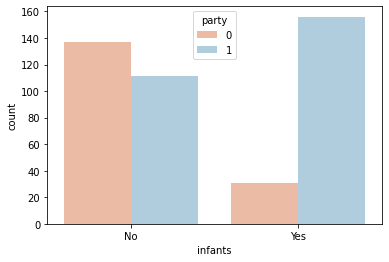

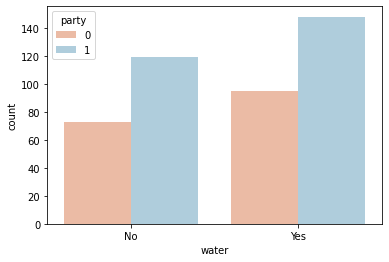

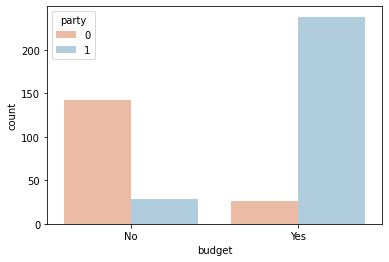

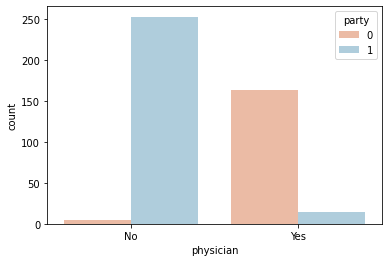

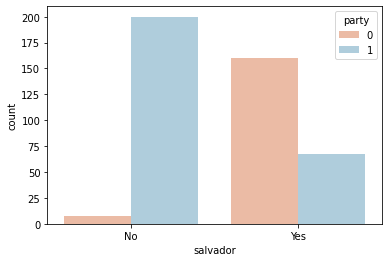

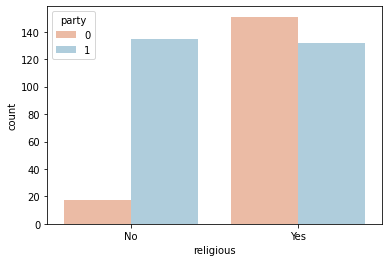

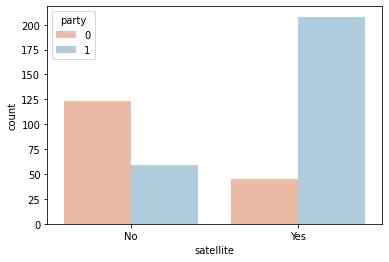

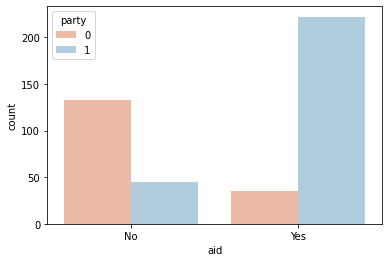

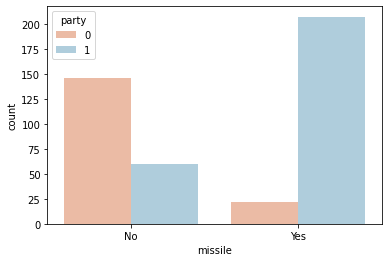

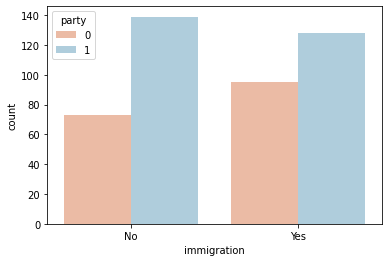

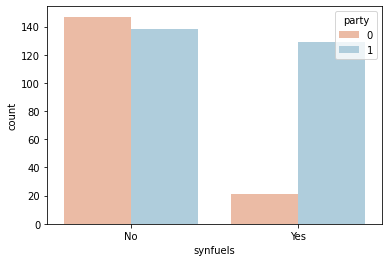

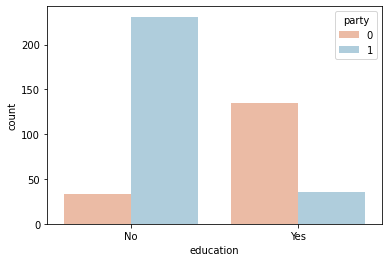

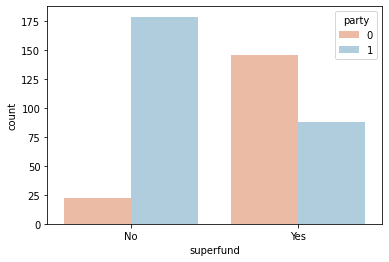

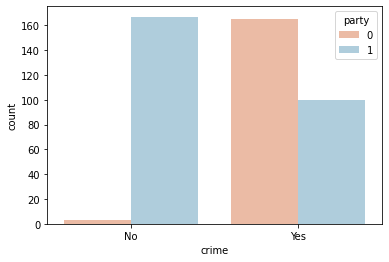

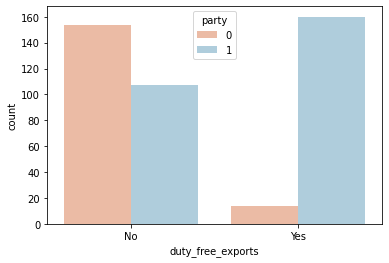

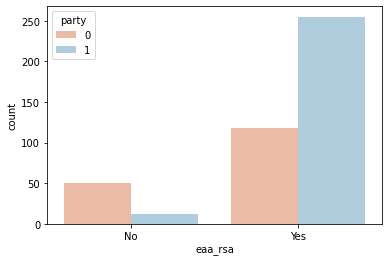

In [48]:
plt.figure()
cols = ['infants',  'water',  'budget',  'physician',  'salvador',  'religious', 'satellite',  'aid',  'missile',  'immigration',  'synfuels',  'education',  'superfund', 'crime',  'duty_free_exports',  'eaa_rsa']
for col in cols:
    sns.countplot(x=col, hue='party', data=df, palette='RdBu')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.show()

### KNeighborsClassifier

In [49]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# split the dataset to train/test 
X_train ,X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=42, stratify=y)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [50]:
# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# evaluate the model
knn.score(X_test, y_test)

0.9083969465648855

Increasing the n_neighbors will smoose the boundary and become less complex model and dcreasing it will cause overfitting because it becomes complex model

### Evaluation metrices 

In [51]:
from sklearn.metrics import confusion_matrix, classification_report 
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[48  3]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        51
           1       0.96      0.89      0.92        80

    accuracy                           0.91       131
   macro avg       0.90      0.91      0.91       131
weighted avg       0.91      0.91      0.91       131



In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9083969465648855

#### MultiClassifier

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
[0 1 2 3 4 5 6 7 8 9]
(1797, 8, 8)
(1797, 64)


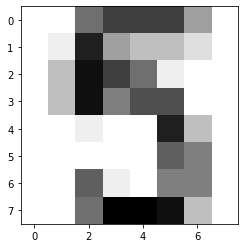

In [34]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and feature_names of the dataset
print(digits.keys())
print(digits.target_names)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [37]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X_d = digits.data
y_d = digits.target

# Split into training and test set
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size = .2, random_state=42, stratify=y_d)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train_d, y_train_d)

# Print the accuracy
print(knn.score(X_test_d, y_test_d))

0.9833333333333333


In [38]:
print(knn.predict(X_test_d[100].reshape(1, -1)))

[6]


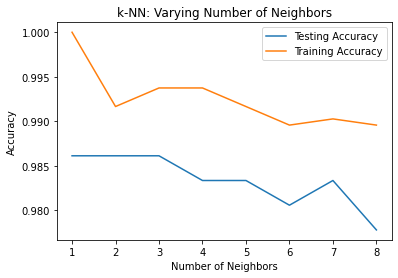

In [39]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_d, y_train_d)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_d, y_train_d)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_d, y_test_d)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## logistic regression model

In [54]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 57   2]
 [  3 112]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        59
           1       0.98      0.97      0.98       115

    accuracy                           0.97       174
   macro avg       0.97      0.97      0.97       174
weighted avg       0.97      0.97      0.97       174



#### ROC curve

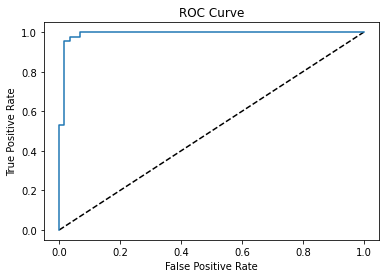

In [55]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [56]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9904200442151806
AUC scores computed using 5-fold cross-validation: [0.99667037 0.99334073 0.99583796 1.         0.96268238]


### Hyperparameter Tuning

In [57]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}
Best score is 0.960919540229885


## DecisionTreeClassifier

In [58]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 5}
Best score is 0.9425287356321839


## Regression Algorithms

In [3]:
life_df = pd.read_csv('gm_2008_region.csv')
life_df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


### EDA

In [62]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [63]:
life_df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


<AxesSubplot:>

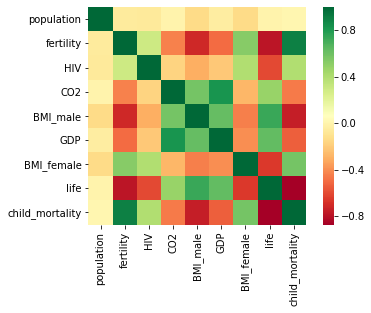

In [64]:
sns.heatmap(life_df.corr(), square=True, cmap='RdYlGn')

### LinerRegression with one feature

In [65]:
# Create arrays for features and target variable
y = life_df['life'].values
X = life_df.drop(['life', 'Region'], axis=1)
X_fertility = life_df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X_fertility.shape)

# Reshape X and y
y_reshaped = y.reshape(-1,1)
X_fertility_reshaped = X_fertility.reshape(-1,1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_fertility_reshaped.shape)

Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


0.6192442167740035


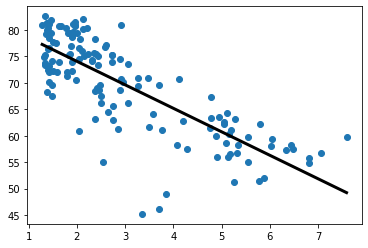

In [66]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression  

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility_reshaped), max(X_fertility_reshaped)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility_reshaped, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility_reshaped, y))

plt.scatter(X_fertility_reshaped, y)
# Plot regression line
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

### LinearRegression with multiple features

In [20]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731429361
Root Mean Squared Error: 3.2476010800377213


Using all features has improved the model score. This makes sense, as the model has more information to learn from. 

#### K-fold cross-validation

In [21]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793579


Now that you have cross-validated your model, you can more confidently evaluate its predictions.

#### Lasso Regularization for features selection

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


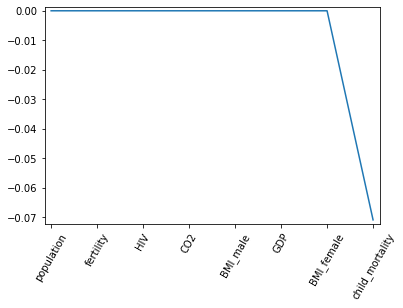

In [22]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = .4, normalize=True)

# Fit the regressor to the data
lasso.fit(X, y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
df_columns = X.columns
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

#### Ridge Regularization

In [23]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found

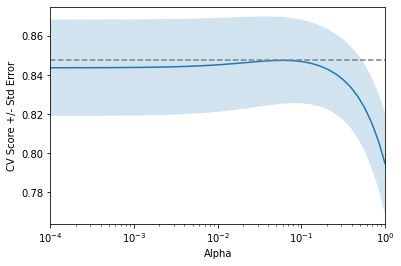

In [24]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas.

## ElasticNet

In [68]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.486217585064, tolerance: 0.558941590909091
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.84663914862773, tolerance: 0.5893071666666668
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.50344008061256, tolerance: 0.5890250303030303
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.6

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398441


## Data Preprocessing

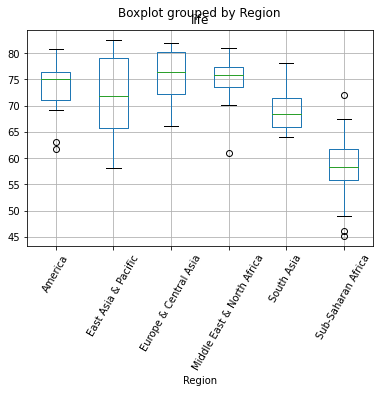

In [5]:
# Create a boxplot of life expectancy per region
life_df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

#### Creating dummy variables

In [7]:
# Create dummy variables: df_region
df_region = pd.get_dummies(life_df, columns=['Region'])

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(life_df, columns=['Region'], drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [10]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Create arrays for features and target variable
y = df_region['life'].values
X = df_region.drop(['life'], axis=1)

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X, y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


## Building pipeline

In [49]:
cols = ['party', 'infants',  'water',  'budget',  'physician',  'salvador',  'religious', 'satellite',  'aid',  'missile',  'immigration',  'synfuels',  'education',  'superfund', 'crime',  'duty_free_exports',  'eaa_rsa']
df = pd.read_csv('house-votes-84.csv', names=cols)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [63]:
cat_cols = {'party':{"democrat":1, "republican":0},
                'infants': {"y": 1, "n": 0},  
                'water': {"y": 1, "n": 0},  
                'budget': {"y": 1, "n": 0},'physician': {"y": 1, "n": 0},
                'salvador': {"y": 1, "n": 0},  
                'religious': {"y": 1, "n": 0}, 
                'satellite': {"y": 1, "n": 0}, 
                'aid': {"y": 1, "n": 0},  
                'missile': {"y": 1, "n": 0},  
                'immigration': {"y": 1, "n": 0}, 
                'synfuels': {"y": 1, "n": 0}, 
                'education': {"y": 1, "n": 0},  
                'superfund': {"y": 1, "n": 0}, 
                'crime': {"y": 1, "n": 0}, 
                'duty_free_exports': {"y": 1, "n": 0},  
                'eaa_rsa': {"y": 1, "n": 0}}
df = df.replace(cat_cols)

In [64]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64


#### Imputing missing data in a ML Pipeline 

In [65]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create arrays for the features and the response variable
y = df['party']
X = df.drop('party', axis=1)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.98      0.96      0.97        85

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



### Centering and scaling in a pipeline

In [94]:
wine_df = pd.read_csv('white-wine.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [95]:
wine_df['quality'] = [1 if x < 5  else 0  for x in wine_df['quality']]

In [96]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

X = wine_df.drop('quality', axis=1)
y= wine_df['quality']

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


### Pipleline with Gridsearch

In [98]:
from sklearn.model_selection import GridSearchCV

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       951
           1       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


### Pipeline with ElasticNet 

In [106]:
from sklearn.linear_model import ElasticNet

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create arrays for features and target variable
y = df_region['life'].values
X = df_region.drop(['life'], axis=1)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters, cv=3)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663.1738658765369, tolerance: 0.4518648363636363
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 699.3110268720884, tolerance: 0.5123628000000002
  positive)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 686.3505426948631, tolerance: 0.4854468571428572
  positive)


Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016549771036
